In [1]:
# Summary of what was done in this notebook, in order:
# 1) imported all data sets
# 2) merged all data sets into master data set, dropped duplicates, dropped NaNs
# 3) added calculation profit_per_ride, inserted as column in master data
# 4) created pie chart for total number rides for both companies
# 5) created bar chart for rides per quarter and year
#     a) inserted date column which is conversion of Date of Travel into date
#     b) inserted quarter column, grouping date into quarters
# 6) added calculation profit_per_km, inserted as column in master data
# 7) calculated: total profit, total profit per company, profit per ride per company, profit per year per company
# 8) added line chart showing profit per year per company
# 9) added bar chart showing profit per km progress over quarters/years
# 10) calculated number of distinct customers for each company
# 11) calculated number of rides for each customer, for each company
# 12) started preparing data set for forecasting 
#     a) plotted scatter + trendline
#     b) next step would be to use one of the forecasting methods for 2019

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
cab_data_df = pd.read_csv("/Users/milanbanjanin/Python Courses/Data Glacier internship/DataSets-main/Cab_Data.csv")

In [4]:
city_df = pd.read_csv("/Users/milanbanjanin/Python Courses/Data Glacier internship/DataSets-main/City.csv")

In [5]:
customer_id_df = pd.read_csv("/Users/milanbanjanin/Python Courses/Data Glacier internship/DataSets-main/Customer_ID.csv")

In [6]:
transaction_id_df = pd.read_csv("/Users/milanbanjanin/Python Courses/Data Glacier internship/DataSets-main/Transaction_ID.csv")

In [7]:
cab_data_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [8]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [9]:
customer_id_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [10]:
transaction_id_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [11]:
master_data = pd.merge(transaction_id_df, cab_data_df, on="Transaction ID")

In [12]:
master_data.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [13]:
master_data = pd.merge(master_data, customer_id_df, on="Customer ID")

In [14]:
master_data.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237


In [15]:
master_data.count()

Transaction ID        359392
Customer ID           359392
Payment_Mode          359392
Date of Travel        359392
Company               359392
City                  359392
KM Travelled          359392
Price Charged         359392
Cost of Trip          359392
Gender                359392
Age                   359392
Income (USD/Month)    359392
dtype: int64

In [16]:
master_data.drop_duplicates()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417
359388,10439799,12490,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713
359389,10439838,41414,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960
359390,10439840,41677,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454


In [17]:
master_data.dropna()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417
359388,10439799,12490,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713
359389,10439838,41414,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960
359390,10439840,41677,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454


In [18]:
# insert profit per ride column
master_data.insert(9, "Profit", master_data["Price Charged"] - master_data["Cost of Trip"])

In [19]:
master_data.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,Male,28,10813
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,Male,28,10813
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,Male,28,10813
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,Male,27,9237
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,Male,27,9237


In [20]:
master_data.Profit.idxmax()

96554

In [21]:
master_data.loc[96554]

Transaction ID           10170615
Customer ID                  1126
Payment_Mode                 Cash
Date of Travel              42860
Company                Yellow Cab
City                  NEW YORK NY
KM Travelled                 46.8
Price Charged             2048.03
Cost of Trip              584.064
Profit                   1463.966
Gender                       Male
Age                            18
Income (USD/Month)           8825
Name: 96554, dtype: object

In [22]:
# pie chart for rides per company across 2016, 2017, 2018

Text(0.5, 1.0, 'Total Rides')

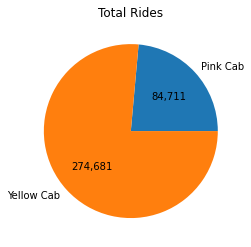

In [23]:
rides_per_company = master_data.groupby("Company").agg({"Company": pd.Series.count})
rides_per_company
plt.pie(rides_per_company["Company"], labels=["Pink Cab", "Yellow Cab"], autopct=lambda p: '{:,.0f}'.format(p * master_data["City"].count() / 100))
plt.title("Total Rides")

In [112]:
rides_per_company

,Company
Company,
Pink Cab,84711
Yellow Cab,274681


In [24]:
# bar chart for rides per quarter and year

In [25]:
# add date column which converts Date of Travel to date
master_data['date'] = pd.to_datetime(master_data['Date of Travel'], unit='D', origin='1899-12-30')

In [26]:
# add quarter column which converts date column into a specific yearquarter
master_data['quarter'] = pd.PeriodIndex(master_data["date"], freq='Q')

In [96]:
master_data.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Gender,Age,Income (USD/Month),date,quarter
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,Male,28,10813,2016-01-08,2016Q1
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,Male,28,10813,2018-07-21,2018Q3
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,Male,28,10813,2018-11-23,2018Q4
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,Male,27,9237,2016-01-06,2016Q1
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,Male,27,9237,2018-04-21,2018Q2


In [124]:
rides_per_quarter = master_data.groupby(["Company", "quarter"]).agg({"date": pd.Series.count})
rides_per_quarter

date
Company    quarter       
Pink Cab   2016Q1    3208
           2016Q2    4537
           2016Q3    7251
           2016Q4   10084
           2017Q1    4432
           2017Q2    5294
           2017Q3    8662
           2017Q4   11933
           2018Q1    5015
           2018Q2    5089
           2018Q3    8074
           2018Q4   11132
Yellow Cab 2016Q1   13539
           2016Q2   16994
           2016Q3   21862
           2016Q4   29844
           2017Q1   18031
           2017Q2   19516
           2017Q3   25799
           2017Q4   34843
           2018Q1   18902
           2018Q2   18418
           2018Q3   24210
           2018Q4   32723

In [136]:
pink_rides_per_quarter = rides_per_quarter[:12]
pink_rides_per_quarter

date
Company  quarter       
Pink Cab 2016Q1    3208
         2016Q2    4537
         2016Q3    7251
         2016Q4   10084
         2017Q1    4432
         2017Q2    5294
         2017Q3    8662
         2017Q4   11933
         2018Q1    5015
         2018Q2    5089
         2018Q3    8074
         2018Q4   11132

(-0.5, 11.5, 0.0, 45000.0)

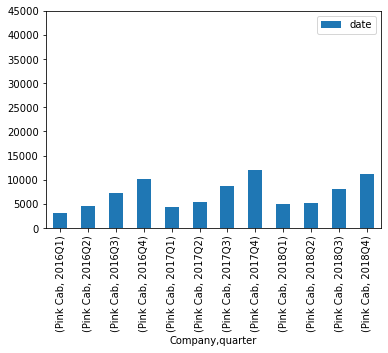

In [167]:
pink_bar = pink_rides_per_quarter.plot.bar()
pink_bar.axis([-0.5, 11.5, 0.0, 45000.00])

In [146]:
yellow_rides_per_quarter = rides_per_quarter[12:]
yellow_rides_per_quarter

date
Company    quarter       
Yellow Cab 2016Q1   13539
           2016Q2   16994
           2016Q3   21862
           2016Q4   29844
           2017Q1   18031
           2017Q2   19516
           2017Q3   25799
           2017Q4   34843
           2018Q1   18902
           2018Q2   18418
           2018Q3   24210
           2018Q4   32723

(-0.5, 11.5, 0.0, 45000.0)

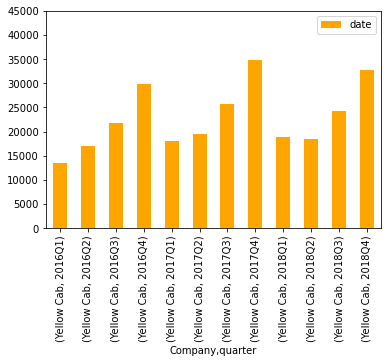

In [160]:
yellow_bar = yellow_rides_per_quarter.plot.bar(color="orange")
yellow_bar.axis([-0.5, 11.5, 0.0, 45000.00])

In [170]:
# profit per KM add
master_data.insert(10, "Profit per KM", master_data["Profit"] / master_data["KM Travelled"])
master_data.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit per KM,Gender,Age,Income (USD/Month),date,quarter
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266,Male,28,10813,2016-01-08,2016Q1
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,10.739870,Male,28,10813,2018-07-21,2018Q3
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,4.574571,Male,28,10813,2018-11-23,2018Q4
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904,Male,27,9237,2016-01-06,2016Q1
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,6.981330,Male,27,9237,2018-04-21,2018Q2


In [171]:
# total profit
master_data["Profit"].sum()

49327701.4918

In [174]:
# yellow cab profit
yellow_profit = master_data.loc[master_data['Company'] == "Yellow Cab", 'Profit'].sum()
yellow_profit

44020373.17079999

In [177]:
# yellow cab rides
yellow_rides = master_data.loc[master_data['Company'] == "Yellow Cab", 'Profit'].count()
yellow_rides

274681

In [179]:
# yellow profit per ride
yellow_profit_per_ride = yellow_profit / yellow_rides
yellow_profit_per_ride

160.2599858410301

In [175]:
# pink cab profit
pink_profit = master_data.loc[master_data['Company'] == "Pink Cab", 'Profit'].sum()
pink_profit

5307328.3209999995

In [180]:
# pink cab rides
pink_rides = master_data.loc[master_data['Company'] == "Pink Cab", 'Profit'].count()
pink_rides

84711

In [181]:
# pink profit per ride
pink_profit_per_ride = pink_profit / pink_rides
pink_profit_per_ride

62.65217410961976

In [184]:
# profit per year per cab
profit_per_quarter = master_data.groupby(["Company", "quarter"]).agg({"Profit": pd.Series.sum})
profit_per_quarter

Profit
Company    quarter              
Pink Cab   2016Q1   2.492296e+05
           2016Q2   2.152461e+05
           2016Q3   3.813755e+05
           2016Q4   8.676600e+05
           2017Q1   3.589230e+05
           2017Q2   2.567173e+05
           2017Q3   4.661954e+05
           2017Q4   9.518192e+05
           2018Q1   3.310399e+05
           2018Q2   1.751838e+05
           2018Q3   3.370008e+05
           2018Q4   7.169376e+05
Yellow Cab 2016Q1   2.760242e+06
           2016Q2   3.479802e+06
           2016Q3   3.197748e+06
           2016Q4   4.489204e+06
           2017Q1   3.602691e+06
           2017Q2   3.924204e+06
           2017Q3   3.760759e+06
           2017Q4   5.288324e+06
           2018Q1   3.122696e+06
           2018Q2   3.235419e+06
           2018Q3   2.901709e+06
           2018Q4   4.257576e+06

In [203]:
pink_profit_2016 = profit_per_quarter[:4]["Profit"].sum()
pink_profit_2017 = profit_per_quarter[4:8]["Profit"].sum()
pink_profit_2018 = profit_per_quarter[8:12]["Profit"].sum()
yellow_profit_2016 = profit_per_quarter[12:16]["Profit"].sum()
yellow_profit_2017 = profit_per_quarter[16:20]["Profit"].sum()
yellow_profit_2018 = profit_per_quarter[20:]["Profit"].sum()

(-0.1, 2.1, 809371.40005, 17326768.75695)

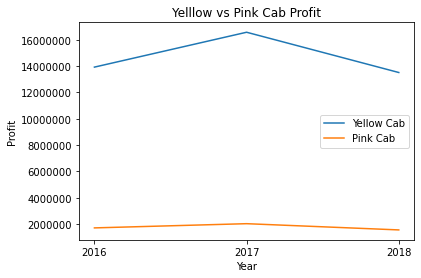

In [226]:
plt.plot(["2016", "2017", "2018"], [yellow_profit_2016, yellow_profit_2017, yellow_profit_2018])
plt.title('Yelllow vs Pink Cab Profit')
plt.plot(["2016", "2017", "2018"], [pink_profit_2016, pink_profit_2017, pink_profit_2018])
plt.xlabel('Year')
plt.ylabel('Profit')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(["Yellow Cab", "Pink Cab"])
plt.axis()

In [227]:
# profit per ride progress over time

In [230]:
master_data.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit per KM,Gender,Age,Income (USD/Month),date,quarter
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266,Male,28,10813,2016-01-08,2016Q1
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,10.739870,Male,28,10813,2018-07-21,2018Q3
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,4.574571,Male,28,10813,2018-11-23,2018Q4
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904,Male,27,9237,2016-01-06,2016Q1
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,6.981330,Male,27,9237,2018-04-21,2018Q2


In [229]:
profit_per_ride_per_quarter = master_data.groupby(["Company", "quarter"]).agg({"Profit per KM": pd.Series.mean})
profit_per_ride_per_quarter

Profit per KM
Company    quarter               
Pink Cab   2016Q1        3.410580
           2016Q2        2.126384
           2016Q3        2.332025
           2016Q4        3.809442
           2017Q1        3.548688
           2017Q2        2.118694
           2017Q3        2.391938
           2017Q4        3.534271
           2018Q1        2.921309
           2018Q2        1.508489
           2018Q3        1.847225
           2018Q4        2.843160
Yellow Cab 2016Q1        8.976271
           2016Q2        9.126738
           2016Q3        6.462698
           2016Q4        6.635858
           2017Q1        8.866195
           2017Q2        8.950471
           2017Q3        6.447089
           2017Q4        6.745008
           2018Q1        7.329005
           2018Q2        7.767653
           2018Q3        5.332482
           2018Q4        5.782021

In [232]:
pink_profit_per_ride_per_quarter = profit_per_ride_per_quarter[:12]
yellow_profit_per_ride_per_quarter = profit_per_ride_per_quarter[12:]

(-0.5, 11.5, 0.0, 9.583074464883985)

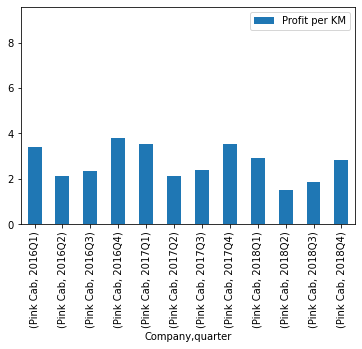

In [241]:
pink_profit_per_ride_per_quarter_bar = pink_profit_per_ride_per_quarter.plot.bar()
pink_profit_per_ride_per_quarter_bar.axis([-0.5, 11.5, 0.0, 9.583074464883985])

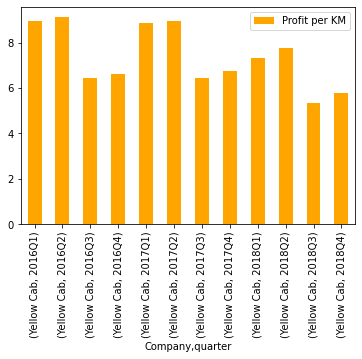

In [239]:
yellow_profit_per_ride_per_quarter_bar = yellow_profit_per_ride_per_quarter.plot.bar(color="orange")

In [242]:
# number of different customers

In [307]:
master_data.groupby("Company")["Customer ID"].nunique()

Company
Pink Cab      32330
Yellow Cab    39896
Name: Customer ID, dtype: int64

In [243]:
# number of rides per customer

In [293]:
rides_per_customer_per_cab = master_data.groupby(["Customer ID", "Company"]).size().reset_index(name="count").sort_values("count",ascending=False)

In [297]:
rides_per_customer_per_cab[rides_per_customer_per_cab["Company"]=="Pink Cab"][:20]

,Customer ID,Company,count
16064,8120,Pink Cab,18
12146,6159,Pink Cab,17
17014,8595,Pink Cab,17
15680,7927,Pink Cab,17
14507,7340,Pink Cab,16
17653,8915,Pink Cab,16
16772,8474,Pink Cab,16
12660,6416,Pink Cab,15
17266,8721,Pink Cab,15
15702,7938,Pink Cab,15


In [298]:
rides_per_customer_per_cab[rides_per_customer_per_cab["Company"]=="Yellow Cab"][:20]

,Customer ID,Company,count
3585,1803,Yellow Cab,47
2704,1360,Yellow Cab,47
981,494,Yellow Cab,47
1263,636,Yellow Cab,46
1794,903,Yellow Cab,45
250,126,Yellow Cab,45
5504,2766,Yellow Cab,45
5129,2577,Yellow Cab,44
3326,1673,Yellow Cab,44
2127,1070,Yellow Cab,44


In [375]:
# forecast for 2019
import numpy

In [308]:
master_data.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit per KM,Gender,Age,Income (USD/Month),date,quarter
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266,Male,28,10813,2016-01-08,2016Q1
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,10.739870,Male,28,10813,2018-07-21,2018Q3
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,4.574571,Male,28,10813,2018-11-23,2018Q4
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904,Male,27,9237,2016-01-06,2016Q1
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,6.981330,Male,27,9237,2018-04-21,2018Q2


In [342]:
num_of_rides_per_day = master_data.groupby(["Company", "date"]).agg({"date": pd.Series.count})
num_of_rides_per_day
# master_data.loc[master_data['Company'] == "Yellow Cab", 'date'].count()

date
Company    date            
Pink Cab   2016-01-02    41
           2016-01-03    52
           2016-01-04     4
           2016-01-05     6
           2016-01-06    23
...                     ...
Yellow Cab 2018-12-27   252
           2018-12-28   626
           2018-12-29   630
           2018-12-30   201
           2018-12-31   198

[2190 rows x 1 columns]

In [392]:
pink_df = num_of_rides_per_day[:1095]
pink_df["day"] = pink_df.index.levels[1]
pink_df['day'] = pd.to_datetime(pink_df['day'])
pink_df['day'] = pink_df['day'].dt.date
pink_df.rename(columns={"date": "Num of Rides", "day": "Date"}, inplace=True)
pink_df

<ipython-input-392-5e53e80bd60b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pink_df["day"] = pink_df.index.levels[1]
<ipython-input-392-5e53e80bd60b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pink_df['day'] = pd.to_datetime(pink_df['day'])
<ipython-input-392-5e53e80bd60b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Num of Rides        Date
Company  date                                
Pink Cab 2016-01-02            41  2016-01-02
         2016-01-03            52  2016-01-03
         2016-01-04             4  2016-01-04
         2016-01-05             6  2016-01-05
         2016-01-06            23  2016-01-06
...                           ...         ...
         2018-12-27            66  2018-12-27
         2018-12-28           217  2018-12-28
         2018-12-29           195  2018-12-29
         2018-12-30            56  2018-12-30
         2018-12-31            58  2018-12-31

[1095 rows x 2 columns]

In [393]:
yellow_df = num_of_rides_per_day[1095:]
yellow_df["day"] = yellow_df.index.levels[1]
yellow_df['day'] = pd.to_datetime(yellow_df['day'])
yellow_df['day'] = yellow_df['day'].dt.date
yellow_df.rename(columns={"date": "Num of Rides", "day": "Date"}, inplace=True)
yellow_df

<ipython-input-393-28333b79fab9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_df["day"] = yellow_df.index.levels[1]
<ipython-input-393-28333b79fab9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_df['day'] = pd.to_datetime(yellow_df['day'])
<ipython-input-393-28333b79fab9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Num of Rides        Date
Company    date                                
Yellow Cab 2016-01-02           140  2016-01-02
           2016-01-03           126  2016-01-03
           2016-01-04            21  2016-01-04
           2016-01-05            41  2016-01-05
           2016-01-06            86  2016-01-06
...                             ...         ...
           2018-12-27           252  2018-12-27
           2018-12-28           626  2018-12-28
           2018-12-29           630  2018-12-29
           2018-12-30           201  2018-12-30
           2018-12-31           198  2018-12-31

[1095 rows x 2 columns]

<ipython-input-394-60747c1ff242>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pink_df['Date'] = pink_df['Date'].apply(date2num)


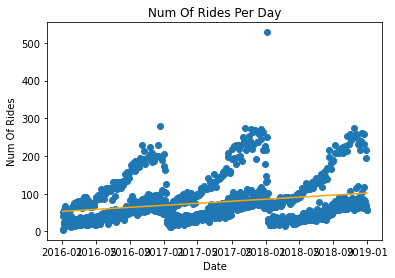

In [394]:
from matplotlib.dates import date2num
plt.scatter(pink_df.Date,pink_df["Num of Rides"])
pink_df['Date'] = pink_df['Date'].apply(date2num)
plt.title('Num Of Rides Per Day')
plt.xlabel('Date')
plt.ylabel('Num Of Rides')
z = numpy.polyfit(pink_df.Date, pink_df["Num of Rides"], 1)
p = numpy.poly1d(z)
#add trendline to plot
plt.plot(pink_df.Date, p(pink_df.Date), color="orange")
plt.show()

<ipython-input-396-e4e498f8989c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_df['Date'] = yellow_df['Date'].apply(date2num)


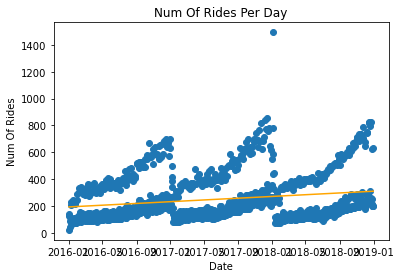

In [396]:
plt.scatter(yellow_df.Date,yellow_df["Num of Rides"])
yellow_df['Date'] = yellow_df['Date'].apply(date2num)
plt.title('Num Of Rides Per Day')
plt.xlabel('Date')
plt.ylabel('Num Of Rides')
z = numpy.polyfit(yellow_df.Date, yellow_df["Num of Rides"], 1)
p = numpy.poly1d(z)
#add trendline to plot
plt.plot(yellow_df.Date, p(yellow_df.Date), color="orange")
plt.show()

In [2]:
master_data.head()

NameError: name 'master_data' is not defined